# Introduction
In this project we will analysts the show appointment data this dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

The first step:we import the needed library 
The second step in Data weangling:we show and cleaning the data like drop, change name of some column snd check if we null value
The third step in EDA:we wrot three questions and i visualized it in plots.
Three questions are: 
who are the most patients female or male? 
Who are the most infected by diabetes male or female?
What is the distribution of the age for the patient who infected diabetes and not infected?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('nnoshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Check if there dubplicate data

In [3]:
print(sum(df.duplicated()))

0


## Check if i have dubplicate in my data or not

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Describe my data to understand more my data

In [6]:
## Check if i have null in my data or not
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



In [7]:
df.rename(columns={"Hipertension" : "Hypertension"}, inplace=True)
df.rename(columns = {'Handcap': 'Handicap'} , inplace=True)
df.rename(columns = {'No-show':'No_show'} , inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# correcting the spelling of Hipertension, Handcap and the dash of No-show words

In [8]:
##change the format scheduledDay and AppointmentDay column.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## change the format scheduledDay and AppointmentDay column.


In [9]:
 
df['Age'].value_counts(bins=12)

(-1.117, 8.667]      16104
(47.333, 57.0]       15821
(37.667, 47.333]     14323
(18.333, 28.0]       13841
(28.0, 37.667]       13409
(8.667, 18.333]      12763
(57.0, 66.667]       12152
(66.667, 76.333]      7293
(76.333, 86.0]        3921
(86.0, 95.667]         854
(95.667, 105.333]       41
(105.333, 115.0]         5
Name: Age, dtype: int64

## count the age of patient

In [10]:
df.drop(df[df.Age <= 0].index, inplace=True)


## Drop the age under or equal the zero

In [11]:
df.loc[df.Diabetes == 1,:]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
36,7.298460e+13,5637975,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,S��O CRIST��V��O,0,1,1,0,0,0,No
37,1.578130e+12,5637986,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,No
41,8.224320e+14,5633339,F,2016-04-28 09:20:36+00:00,2016-04-29 00:00:00+00:00,71,MARU̍PE,0,0,1,0,0,0,No
44,2.741650e+11,5635414,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,S��O CRIST��V��O,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110448,2.629180e+14,5756082,F,2016-06-01 07:56:41+00:00,2016-06-06 00:00:00+00:00,40,RESIST�_NCIA,0,1,1,0,0,1,No
110456,4.994740e+12,5772107,F,2016-06-03 14:34:46+00:00,2016-06-03 00:00:00+00:00,79,RESIST�_NCIA,0,1,1,0,0,0,No
110468,3.227470e+11,5763322,F,2016-06-02 08:49:21+00:00,2016-06-07 00:00:00+00:00,76,RESIST�_NCIA,0,1,1,0,0,1,No
110477,2.798490e+13,5673472,F,2016-05-09 09:24:09+00:00,2016-06-06 00:00:00+00:00,67,RESIST�_NCIA,0,0,1,0,0,1,No


## count the patient who infected by diabetes 

In this section we do some steps
1-We describe the data for seee and understand the data 
2-we check if we have doublicat 
3- Check if we have null in my data or not
4- we correcting the spelling of some column
5-we change the format of scheduledDay and AppointmentDay column.
6-we Drop the age under or equal the zero
 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



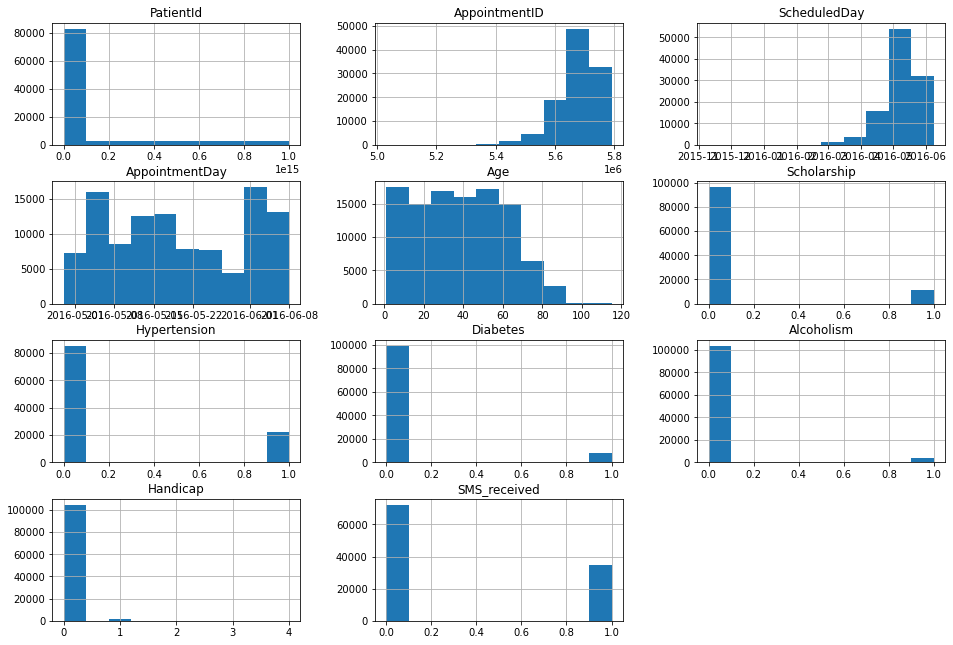

In [12]:

df.hist(figsize= (16,11));

## Show the histograme of all column to understand more the data

## first question: who are the most patients female or male?

In [13]:
Female =df.Gender == 'F'
Male =df.Gender == 'M'


In [14]:
df.Gender.value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

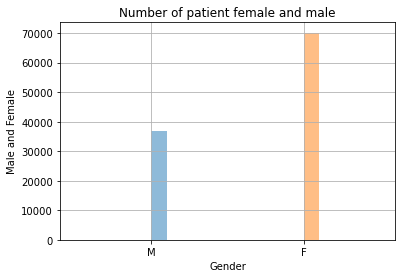

In [16]:
df.Gender[Male].hist(alpha=0.5, label= 'Male')
df.Gender[Female].hist(alpha=0.5, label= 'Female')
plt.title("Number of patient female and male")
plt.ylabel("Male and Female")
plt.xlabel("Gender")
plt.show()
##plt.legend()


## we noticed the female patientsare  more than male patients.

In [17]:
Gender_num = df.Gender.value_counts('Female')*100
Gender_num

F    65.538804
M    34.461196
Name: Gender, dtype: float64

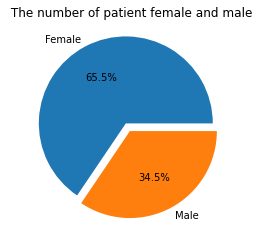

In [18]:

labels = ['Female', 'Male']
explode = (0.1, 0)

plt.pie(Gender_num , labels = labels, explode = explode, autopct= '%1.1f%%' )
       
plt.title(' The number of patient female and male');

## Secound question: Who are the most infected by diabetes male of female?

In [19]:
df.groupby('Gender').Diabetes.value_counts()

Gender  Diabetes
F       0           64512
        1            5606
M       0           34532
        1            2337
Name: Diabetes, dtype: int64

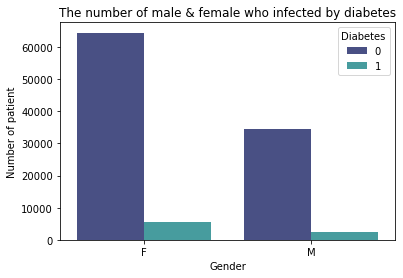

In [20]:
sns.countplot(data = df, x = 'Gender' , palette= 'mako', hue= df.Diabetes)
plt.title("The number of male & female who infected by diabetes")
plt.ylabel("Number of patient")
plt.xlabel("Gender")
plt.show()

## the number of female and male who infected diabetes less than who not infected.


## Most people who infected by  diabetes thier age under 65 years old


In [21]:
Diabetes=df.Diabetes == False
No_Diabetes=df.Diabetes == True


In [22]:
df.Age[No_Diabetes].mean()

61.37252927105627

In [23]:
df.Age[Diabetes].mean()

36.46703485319656

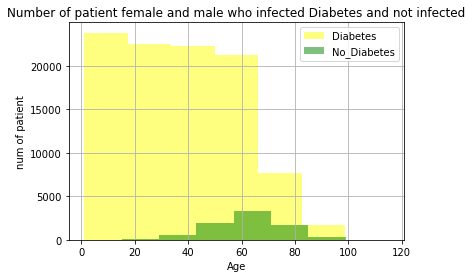

In [24]:
df.Age[Diabetes].hist(alpha=0.5 , bins=7 , label='Diabetes' , color= 'yellow')
df.Age[No_Diabetes].hist(alpha=0.5 , bins=7 , label='No_Diabetes' , color= 'green')
plt.title("Number of patient female and male who infected Diabetes and not infected")
plt.ylabel("num of patient")
plt.xlabel("Age")
plt.legend();


## Most people who infected by diabetes thier ages under 65 years old.   



## Conclusions

At the end after analyzing and cleaning we answered these three question.
First question(pie chart): who are the most patients female or male? 
From the first graph we noticed the female patientsare  more than male patients.

Secound question: Who are the most infected by diabetes male or female?
From the second chart the number of female and male who infected diabetes less than who not infected.

    
Third question: What is the distribution of the age for the patient who infected diabetes and not infected?
Most people who infected by diabetes thier ages under 65 years old.   

One limitation of this analysis was the lack of time and date of appp to be able to see the data in time serious.